#Image Enhancement

Method Used: Block Matching and 3D filtering (BM3D denoising)

In [ ]:
!pip install scikit-image matplotlib bm3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import bm3d
import numpy as np
from skimage import io, img_as_float, util
from skimage.transform import resize
import matplotlib.pyplot as plt
from scipy import ndimage

## Define utility methods

In [ ]:
def resize_image2square(image, new_shape=(512,512)):
  (width, height) = image.shape
  if width > height:
    edge_size = int((width-height) / 2)
    image = image[edge_size:-edge_size, :height]
  else:
    edge_size = int((height-width) / 2)
    image = image[:width, edge_size:-edge_size]

  return resize(image, new_shape, anti_aliasing=True)

## Load Image

In [ ]:
## Load original image 1 to grayscale
# Image of building and road
image_1 = io.imread('/content/drive/MyDrive/OAE5133: Image Proc/Tutorial 1/images/pexels-eugenia-remark-13938824.jpg', as_gray=True)
image_1 = img_as_float(image_1)

image_1 = resize_image2square(image_1, (600,600))


In [ ]:
## Load original image 2 to grayscale
# Image of bicycle
image_2 = io.imread('/content/drive/MyDrive/OAE5133: Image Proc/Tutorial 1/images/pexels-marjorie-matias-16961970.jpg', as_gray=True)
image_2 = img_as_float(image_2)

image_2 = resize_image2square(image_2, (600,600))

## Add Noise to Image

In [ ]:
# Create a noisy image (image_1) with Gaussian, Salt-and-pepper and Poisson noise, respectively
noisy_image_gaussian = util.random_noise(image_1, mode='gaussian', var=0.12)
noisy_image_sp = util.random_noise(image_1, mode='s&p', amount=0.2)
noisy_image_speckle = util.random_noise(image_1, mode='speckle', var=0.08)

# Mix Gaussian, Salt-and-pepper and speckle noises to image_2
noisy_image_mixed = util.random_noise(image_2, mode='gaussian', var=0.12)
noisy_image_mixed = util.random_noise(noisy_image_mixed, mode='s&p', amount=0.2)
noisy_image_mixed = util.random_noise(noisy_image_mixed, mode='speckle', var=0.08)

image_data = {
    "Gaussian Noise": noisy_image_gaussian,
    "Salt-and-pepper Noise": noisy_image_sp,
    "Speckle Noise": noisy_image_speckle,
    "Mixture of All Noises": noisy_image_mixed
}

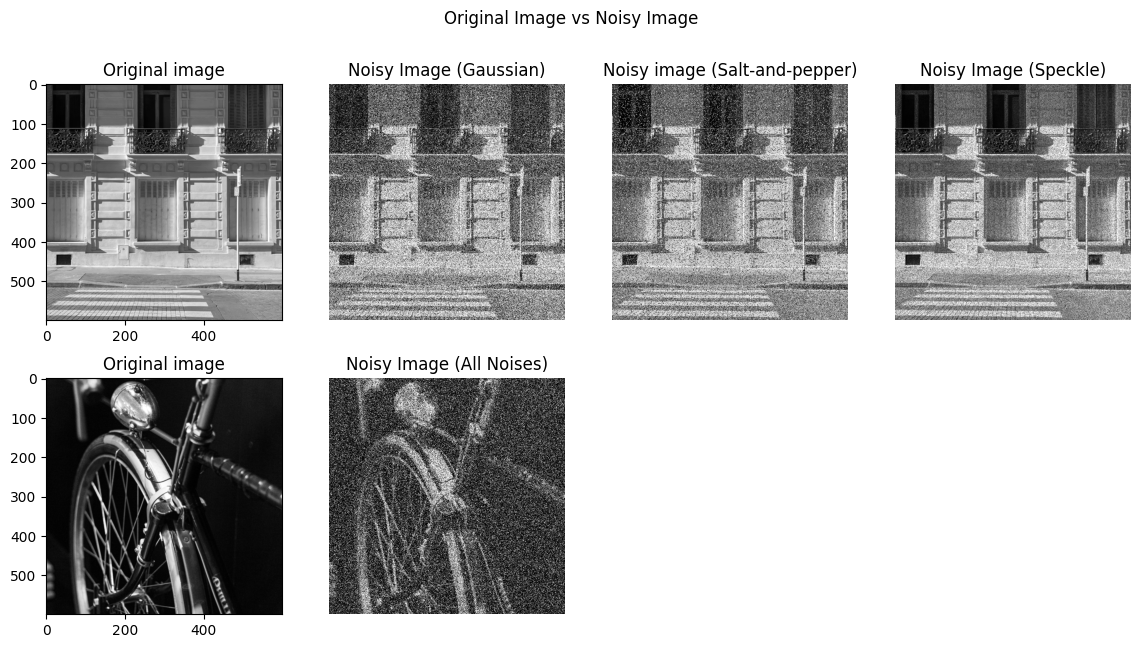

In [ ]:
# Display the original and noisy images
fig, ax = plt.subplots(2, 4, figsize=(14, 7))

## Show image_1
ax[0][0].imshow(image_1, cmap='gray')
ax[0][0].set_title('Original image')
# ax[0][0].axis('off')

ax[0][1].imshow(image_data["Gaussian Noise"], cmap='gray')
ax[0][1].set_title('Noisy Image (Gaussian)')
ax[0][1].axis('off')

ax[0][2].imshow(image_data["Salt-and-pepper Noise"], cmap='gray')
ax[0][2].set_title('Noisy image (Salt-and-pepper)')
ax[0][2].axis('off')

ax[0][3].imshow(image_data["Speckle Noise"], cmap='gray')
ax[0][3].set_title('Noisy Image (Speckle)')
ax[0][3].axis('off')


## Show image_2
ax[1][0].imshow(image_2, cmap='gray')
ax[1][0].set_title('Original image')
# ax[0][0].axis('off')

ax[1][1].imshow(image_data["Mixture of All Noises"], cmap='gray')
ax[1][1].set_title('Noisy Image (All Noises)')
ax[1][1].axis('off')

ax[1][2].axis('off')
ax[1][3].axis('off')

fig.suptitle("Original Image vs Noisy Image")
plt.show()

## Implement BM3D Denoising & Median Filtering

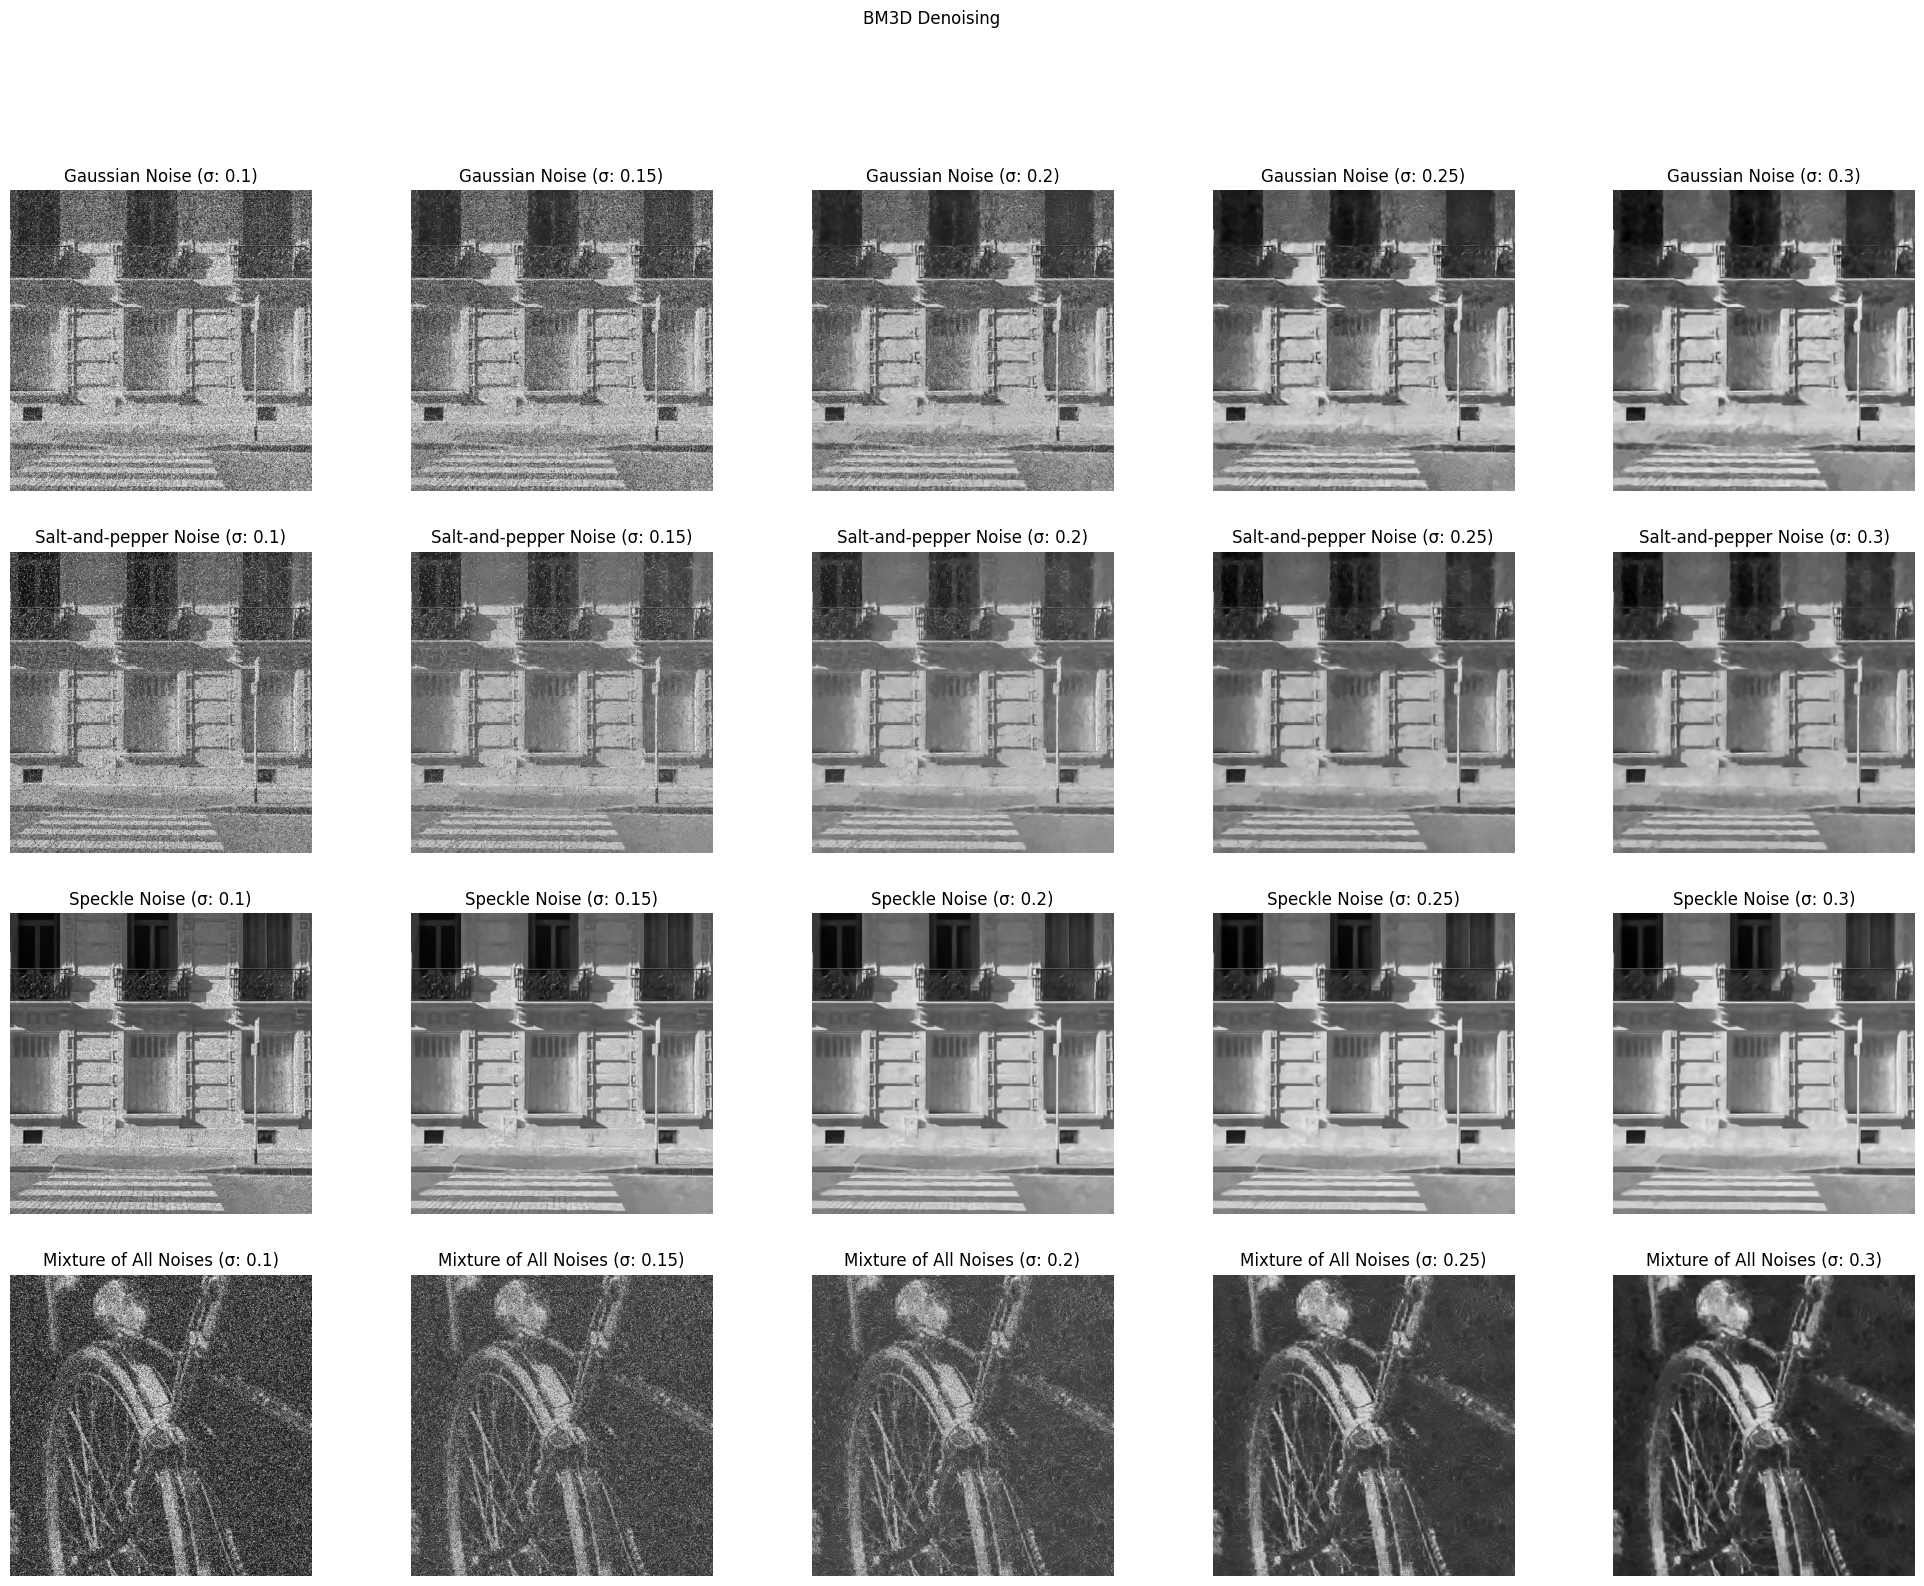

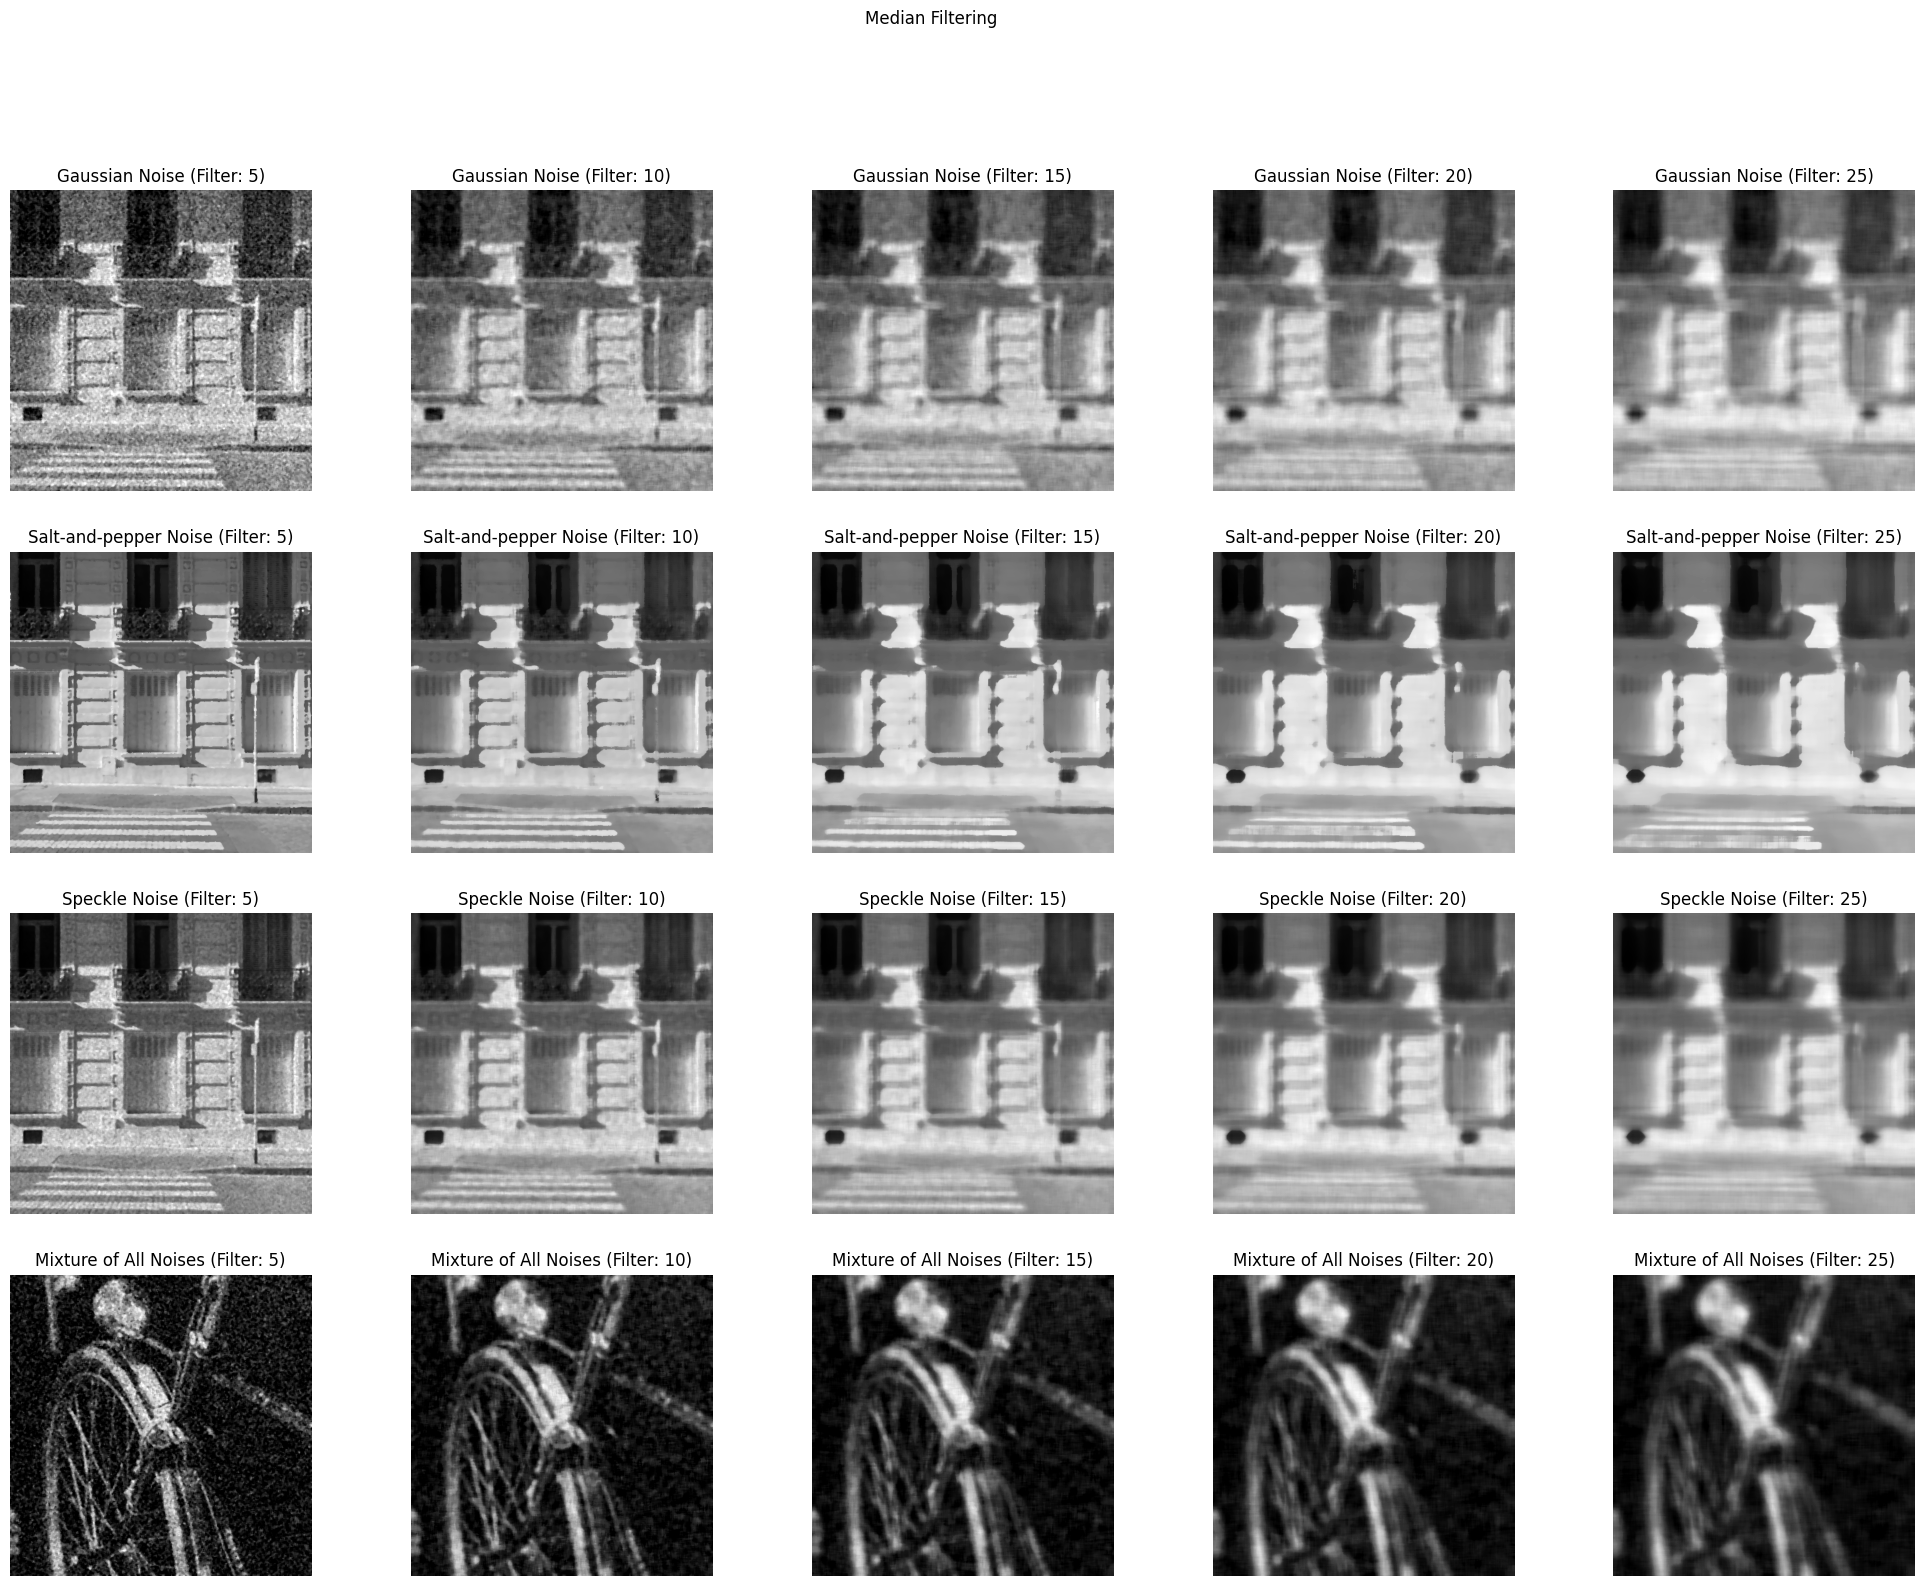

In [ ]:
# Define noise standard deviation
parameter_len = 5
sigmas = np.linspace(0.1, 0.3, num=parameter_len)
filter_size = np.arange(start=5, stop=26, step=parameter_len)

fig1, ax1 = plt.subplots(4, 5, figsize=(25, 18))
fig2, ax2 = plt.subplots(4, 5, figsize=(25, 18))

fig1.suptitle("BM3D Denoising")
fig2.suptitle("Median Filtering")

# Apply BM3D denoising & median filtering
for i, image_key in enumerate(image_data):
  for j in range(parameter_len):
    denoised_image_bm3 = bm3d.bm3d(image_data[image_key], sigma_psd=sigmas[j], stage_arg=bm3d.BM3DStages.ALL_STAGES)
    denoised_image_median = ndimage.median_filter(image_data[image_key], size=filter_size[j])

    # Display the denoised image for BM3
    ax1[i][j].imshow(denoised_image_bm3, cmap="gray")
    ax1[i][j].set_title(f'{image_key} (σ: {sigmas[j]})')
    ax1[i][j].axis('off')

    # Display the denoised image for Median
    ax2[i][j].imshow(denoised_image_median, cmap="gray")
    ax2[i][j].set_title(f'{image_key} (Filter: {filter_size[j]})')
    ax2[i][j].axis('off')

plt.show()